# Coding Project: Deep Learning Basics

* ### Based on the paper:K. He, X. Zhang, S. Ren and J. Sun, “Deep Residual Learning for Image Recognition,” IEEE Conference on Computer Vision and Pattern Recognition (CVPR),2016.

* ### Assignment

  1. Get familiar with our coding environment (on cloud)!
  2. Find a codebase of this paper, download the CIFAR10 and CIFAR100 datasets
  3. Run the basic code on the server, with deep residual networks with 20, 56 and 110 layers, and obtain results (3-time average) on both CIFAR10 and CIFAR100
  4. Finish the required task and one of the optional tasks (see the following slides) –of course, you can do more than one optional tasks if you wish (bonus points)
  5. If you have more ideas, please specify a new task by yourself (bonus points)
  6. Remember: integrate your results into your reading report
  7. Submit your report(as PDF) and code (as README doc) on the iLearningX: https://ilearningx-ru.huaweiuniversity.com/courses/course-v1:HuaweiX+WHURU001+Self-paced/courseware/8825cc7815fa444696520baaf31fa2b0/77b7babd6ae34949bc209d7a8f0ba409/(8)  

Date assigned: Oct. 15, 2019;    Date Due: Dec 31, 2019

## Optional Task 2
* Modifying network architecture
    * Based on the results of the basic (required) experiments
    * How does the change of network structure impact final performance?
* Questions to be discussed in the report
    * What if we adjust the number of residual blocks in different stages? For fair comparison, please keep the number of residual blocks unchanged
    * What if we train residual networks with 50 or 62 layers? How do they compare against the network with 56 layers? 3-time average required!
    * What if we remove all skip connections in residual networks? What if we add a skip connection after each 1 or 3 (not 2) convolutional layers? For fair comparison, please keep the number of convlayers unchanged
    * Note: do not simply report accuracy, discussion on reasons is expected!

## Preparation
One time installation of required libraries from requirement.txt and creating data path

In [3]:
!pip install -r requirements.txt
!mkdir data

You are using pip version 9.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
mkdir: cannot create directory ‘data’: File exists


Downloading CIFAR10 and CIFAR100 datasets

In [4]:
from dataset.dataset_dowloader_ import *

cifar10_dowloader()
cifar100_dowloader()

Successfully download file cv-course-public/coding-1/cifar-10-python.tar.gz from OBS to local ./data/cifar-10-python.tar.gz
Successfully download file cv-course-public/coding-1/cifar-100-python.tar.gz from OBS to local ./data/cifar-100-python.tar.gz


## The basic training and testing pipeline
### What if we adjust the number of residual blocks in different stages? For fair comparison, please keep the number of residual blocks unchanged.
* `layer_values = [[3, 3, 3], [1, 3, 5], [5, 3, 1], [3, 1, 5]]` - define ResNet20 by different number of layers on each of 3 stages
* `history_stages = []` - define train/validation logs' container
* `auto_resnet(layer_j, 100, 1, 180, history_stages)`:
    * `100` - CIFAR100 dataset
    * `1` - learning rate multiplier (base learning rate is 1*0.1)
    * `180` - number of epochs

In [3]:
%%time
from auto_resnet import * 

layer_values = [[3, 3, 3], [1, 3, 5], [5, 3, 1], [3, 1, 5]] # 20
history_stages = []

for layer_j in layer_values:
    auto_resnet(layer_j, 100, 1, 180, history_stages)

_ResNet(
  (conv1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
  )
  (layer1): Sequential(
    (0): _BasicBlock(
      (conv_bn_relu1): Sequential(
        (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace)
      )
      (conv_bn2): Sequential(
        (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (relu_out): ReLU(inplace)
    )
    (1): _BasicBlock(
      (conv_bn_relu1): Sequential(
        (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affi

100%|██████████| 625/625 [00:12<00:00, 50.06it/s, loss:1.6416, acc:54.1825%]
Val loss: 1.9605, accuracy: 48.78%
Epoch: 19/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 50.38it/s, loss:1.6106, acc:54.6475%]
Val loss: 1.9778, accuracy: 48.28%
Epoch: 20/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 49.88it/s, loss:1.5925, acc:55.0250%]
Val loss: 1.9715, accuracy: 48.05%
Epoch: 21/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 50.05it/s, loss:1.5666, acc:56.0275%]
Val loss: 1.8568, accuracy: 51.31%
Epoch: 22/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 50.17it/s, loss:1.5470, acc:56.5700%]
Val loss: 1.9364, accuracy: 49.67%
Epoch: 23/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 49.87it/s, loss:1.5246, acc:57.0625%]
Val loss: 1.9893, accuracy: 48.89%
Epoch: 24/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 49.69it/s, loss:1.5030, acc:57.6175%]
Val loss: 1.8865, accuracy: 50.30%
Epoch: 25/180, lr:1.00e-01
100%|██████████| 625/625 [0

100%|██████████| 625/625 [00:12<00:00, 49.99it/s, loss:1.2018, acc:64.6725%]
Val loss: 1.6292, accuracy: 56.89%
Epoch: 78/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 49.14it/s, loss:1.2010, acc:64.9975%]
Val loss: 1.7474, accuracy: 54.20%
Epoch: 79/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 49.32it/s, loss:1.2037, acc:64.8000%]
Val loss: 1.8295, accuracy: 53.45%
Epoch: 80/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 49.98it/s, loss:1.2081, acc:64.6725%]
Val loss: 1.7580, accuracy: 54.09%
Epoch: 81/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 50.58it/s, loss:1.2061, acc:64.6650%]
Val loss: 1.7840, accuracy: 54.76%
Epoch: 82/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 49.40it/s, loss:1.2070, acc:64.7425%]
Val loss: 1.6737, accuracy: 55.95%
Epoch: 83/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 49.79it/s, loss:1.2003, acc:65.2550%]
Val loss: 1.7939, accuracy: 54.38%
Epoch: 84/180, lr:1.00e-01
100%|██████████| 625/625 [0

100%|██████████| 625/625 [00:13<00:00, 47.85it/s, loss:0.5099, acc:83.8450%]
Val loss: 1.5502, accuracy: 63.20%
Epoch: 137/180, lr:1.00e-02
100%|██████████| 625/625 [00:12<00:00, 51.22it/s, loss:0.5061, acc:84.1600%]
Val loss: 1.4900, accuracy: 64.40%
Epoch: 138/180, lr:1.00e-02
100%|██████████| 625/625 [00:12<00:00, 50.28it/s, loss:0.5072, acc:84.0025%]
Val loss: 1.5005, accuracy: 64.56%
Epoch: 139/180, lr:1.00e-03
100%|██████████| 625/625 [00:12<00:00, 50.18it/s, loss:0.4391, acc:86.3800%]
Val loss: 1.4411, accuracy: 65.91%
Epoch: 140/180, lr:1.00e-03
100%|██████████| 625/625 [00:12<00:00, 49.31it/s, loss:0.4185, acc:87.1975%]
Val loss: 1.4391, accuracy: 65.96%
Epoch: 141/180, lr:1.00e-03
100%|██████████| 625/625 [00:12<00:00, 49.64it/s, loss:0.4094, acc:87.4550%]
Val loss: 1.4381, accuracy: 66.01%
Epoch: 142/180, lr:1.00e-03
100%|██████████| 625/625 [00:12<00:00, 50.06it/s, loss:0.4057, acc:87.8775%]
Val loss: 1.4398, accuracy: 65.80%
Epoch: 143/180, lr:1.00e-03
100%|██████████| 625

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Epoch: 1/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 50.94it/s, loss:4.0814, acc:6.7900%]
Val loss: 3.7143, accuracy: 11.92%
Epoch: 2/180, lr:1.00e-01
100%|██████████| 625/625 [00:11<00:00, 52.41it/s, loss:3.5648, acc:14.8475%]
Val loss: 3.5071, accuracy: 16.09%
Epoch: 3/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 51.17it/s, loss:3.2188, acc:20.8600%]
Val loss: 3.1470, accuracy: 22.50%
Epoch: 4/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 51.43it/s, loss:2.9186, acc:26.2250%]
Val loss: 2.8123, accuracy: 29.21%
Epoch: 5/180, lr:1.00e-01
100%|██████████| 625/625 [00:11<00:00, 52.26it/s, loss:2.6483, acc:31.6850%]
Val loss: 2.6800, accuracy: 31.17%
Epoch: 6/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 51.27it/s, loss:2.4114, acc:36.4875%]
Val loss: 2.6498, accuracy: 32.70%
Epoch: 7/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<0

100%|██████████| 625/625 [00:12<00:00, 51.58it/s, loss:1.1342, acc:66.7350%]
Val loss: 1.6972, accuracy: 57.12%
Epoch: 60/180, lr:1.00e-01
100%|██████████| 625/625 [00:11<00:00, 52.26it/s, loss:1.1451, acc:66.3725%]
Val loss: 1.8859, accuracy: 53.59%
Epoch: 61/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 51.20it/s, loss:1.1354, acc:66.6550%]
Val loss: 1.7084, accuracy: 56.35%
Epoch: 62/180, lr:1.00e-01
100%|██████████| 625/625 [00:11<00:00, 52.17it/s, loss:1.1441, acc:66.0600%]
Val loss: 1.6767, accuracy: 56.76%
Epoch: 63/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 51.65it/s, loss:1.1322, acc:66.7225%]
Val loss: 1.8599, accuracy: 54.44%
Epoch: 64/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 51.88it/s, loss:1.1250, acc:66.9850%]
Val loss: 1.7034, accuracy: 55.70%
Epoch: 65/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 51.63it/s, loss:1.1277, acc:66.7775%]
Val loss: 1.7184, accuracy: 56.31%
Epoch: 66/180, lr:1.00e-01
100%|██████████| 625/625 [0

100%|██████████| 625/625 [00:12<00:00, 52.01it/s, loss:0.3654, acc:88.3300%]
Val loss: 1.5263, accuracy: 65.22%
Epoch: 119/180, lr:1.00e-02
100%|██████████| 625/625 [00:12<00:00, 51.76it/s, loss:0.3597, acc:88.5150%]
Val loss: 1.5507, accuracy: 65.51%
Epoch: 120/180, lr:1.00e-02
100%|██████████| 625/625 [00:12<00:00, 51.99it/s, loss:0.3569, acc:88.6450%]
Val loss: 1.5646, accuracy: 65.23%
Epoch: 121/180, lr:1.00e-02
100%|██████████| 625/625 [00:12<00:00, 50.66it/s, loss:0.3519, acc:88.8525%]
Val loss: 1.5532, accuracy: 65.50%
Epoch: 122/180, lr:1.00e-02
100%|██████████| 625/625 [00:11<00:00, 52.50it/s, loss:0.3496, acc:88.7925%]
Val loss: 1.5682, accuracy: 65.09%
Epoch: 123/180, lr:1.00e-02
100%|██████████| 625/625 [00:12<00:00, 51.19it/s, loss:0.3418, acc:89.0525%]
Val loss: 1.5752, accuracy: 64.73%
Epoch: 124/180, lr:1.00e-02
100%|██████████| 625/625 [00:12<00:00, 50.32it/s, loss:0.3416, acc:89.2150%]
Val loss: 1.5461, accuracy: 65.15%
Epoch: 125/180, lr:1.00e-02
100%|██████████| 625

100%|██████████| 625/625 [00:13<00:00, 47.93it/s, loss:1.8850, acc:48.1125%]
Val loss: 2.2628, accuracy: 43.85%
Epoch: 14/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 48.26it/s, loss:1.8430, acc:48.9425%]
Val loss: 2.0912, accuracy: 44.60%
Epoch: 15/180, lr:1.00e-01
100%|██████████| 625/625 [00:13<00:00, 47.72it/s, loss:1.8115, acc:50.0075%]
Val loss: 2.0834, accuracy: 45.53%
Epoch: 16/180, lr:1.00e-01
100%|██████████| 625/625 [00:13<00:00, 48.00it/s, loss:1.7792, acc:50.8625%]
Val loss: 2.2190, accuracy: 43.38%
Epoch: 17/180, lr:1.00e-01
100%|██████████| 625/625 [00:13<00:00, 47.84it/s, loss:1.7519, acc:51.4750%]
Val loss: 2.0407, accuracy: 46.85%
Epoch: 18/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 48.18it/s, loss:1.7257, acc:52.1850%]
Val loss: 1.9854, accuracy: 46.77%
Epoch: 19/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 48.24it/s, loss:1.7001, acc:52.8100%]
Val loss: 2.1149, accuracy: 46.62%
Epoch: 20/180, lr:1.00e-01
100%|██████████| 625/625 [0

100%|██████████| 625/625 [00:12<00:00, 48.17it/s, loss:1.4107, acc:59.8225%]
Val loss: 2.0243, accuracy: 48.65%
Epoch: 73/180, lr:1.00e-01
100%|██████████| 625/625 [00:13<00:00, 48.02it/s, loss:1.4022, acc:59.9400%]
Val loss: 2.2158, accuracy: 46.49%
Epoch: 74/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 49.05it/s, loss:1.4048, acc:59.9950%]
Val loss: 1.8595, accuracy: 52.06%
Epoch: 75/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 48.52it/s, loss:1.4009, acc:60.0500%]
Val loss: 1.7766, accuracy: 54.00%
Epoch: 76/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 48.15it/s, loss:1.3969, acc:59.9500%]
Val loss: 1.9287, accuracy: 50.15%
Epoch: 77/180, lr:1.00e-01
100%|██████████| 625/625 [00:13<00:00, 47.86it/s, loss:1.3954, acc:60.0725%]
Val loss: 1.7786, accuracy: 52.92%
Epoch: 78/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 49.04it/s, loss:1.3812, acc:60.6825%]
Val loss: 1.8864, accuracy: 51.80%
Epoch: 79/180, lr:1.00e-01
100%|██████████| 625/625 [0

100%|██████████| 625/625 [00:12<00:00, 48.19it/s, loss:0.8449, acc:74.6025%]
Val loss: 1.4531, accuracy: 62.64%
Epoch: 132/180, lr:1.00e-02
100%|██████████| 625/625 [00:13<00:00, 48.03it/s, loss:0.8466, acc:74.6600%]
Val loss: 1.4175, accuracy: 62.96%
Epoch: 133/180, lr:1.00e-02
100%|██████████| 625/625 [00:12<00:00, 48.54it/s, loss:0.8482, acc:74.6875%]
Val loss: 1.4091, accuracy: 63.31%
Epoch: 134/180, lr:1.00e-02
100%|██████████| 625/625 [00:12<00:00, 48.76it/s, loss:0.8456, acc:74.8650%]
Val loss: 1.4170, accuracy: 62.90%
Epoch: 135/180, lr:1.00e-02
100%|██████████| 625/625 [00:12<00:00, 48.69it/s, loss:0.8461, acc:74.8050%]
Val loss: 1.4116, accuracy: 63.43%
Epoch: 136/180, lr:1.00e-02
100%|██████████| 625/625 [00:13<00:00, 47.65it/s, loss:0.8457, acc:74.7075%]
Val loss: 1.4911, accuracy: 62.24%
Epoch: 137/180, lr:1.00e-02
100%|██████████| 625/625 [00:12<00:00, 48.37it/s, loss:0.8398, acc:75.0275%]
Val loss: 1.3962, accuracy: 63.12%
Epoch: 138/180, lr:1.00e-02
100%|██████████| 625

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Epoch: 1/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 49.83it/s, loss:4.0742, acc:6.6800%]
Val loss: 3.8187, accuracy: 10.53%
Epoch: 2/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 49.49it/s, loss:3.6055, acc:13.7600%]
Val loss: 3.5763, accuracy: 14.96%
Epoch: 3/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 50.13it/s, loss:3.2382, acc:20.5500%]
Val loss: 3.2093, accuracy: 21.45%
Epoch: 4/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 49.26it/s, loss:2.9077, acc:26.3825%]
Val loss: 2.8618, accuracy: 28.75%
Epoch: 5/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 49.80it/s, loss:2.6586, acc:31.5525%]
Val loss: 2.6961, accuracy: 31.65%
Epoch: 6/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 49.00it/s, loss:2.4304, acc:35.8675%]
Val loss: 2.5477, accuracy: 34.80%
Epoch: 7/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<0

100%|██████████| 625/625 [00:12<00:00, 50.36it/s, loss:1.1684, acc:65.9200%]
Val loss: 1.7534, accuracy: 54.40%
Epoch: 60/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 49.29it/s, loss:1.1669, acc:65.8825%]
Val loss: 1.6973, accuracy: 56.44%
Epoch: 61/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 49.27it/s, loss:1.1603, acc:65.9525%]
Val loss: 1.7350, accuracy: 55.66%
Epoch: 62/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 48.76it/s, loss:1.1599, acc:65.9850%]
Val loss: 1.7040, accuracy: 55.42%
Epoch: 63/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 49.31it/s, loss:1.1506, acc:66.2800%]
Val loss: 1.7736, accuracy: 54.92%
Epoch: 64/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 49.93it/s, loss:1.1512, acc:66.4100%]
Val loss: 1.8115, accuracy: 54.21%
Epoch: 65/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 50.13it/s, loss:1.1497, acc:66.2575%]
Val loss: 1.7644, accuracy: 55.03%
Epoch: 66/180, lr:1.00e-01
100%|██████████| 625/625 [0

100%|██████████| 625/625 [00:12<00:00, 49.89it/s, loss:0.4004, acc:87.4075%]
Val loss: 1.5371, accuracy: 65.06%
Epoch: 119/180, lr:1.00e-02
100%|██████████| 625/625 [00:12<00:00, 48.29it/s, loss:0.3912, acc:87.5500%]
Val loss: 1.5151, accuracy: 65.32%
Epoch: 120/180, lr:1.00e-02
100%|██████████| 625/625 [00:12<00:00, 50.45it/s, loss:0.3895, acc:87.5400%]
Val loss: 1.5363, accuracy: 64.91%
Epoch: 121/180, lr:1.00e-02
100%|██████████| 625/625 [00:12<00:00, 49.53it/s, loss:0.3853, acc:87.8450%]
Val loss: 1.5377, accuracy: 64.76%
Epoch: 122/180, lr:1.00e-02
100%|██████████| 625/625 [00:12<00:00, 48.94it/s, loss:0.3850, acc:87.7200%]
Val loss: 1.5499, accuracy: 65.28%
Epoch: 123/180, lr:1.00e-02
100%|██████████| 625/625 [00:12<00:00, 49.80it/s, loss:0.3841, acc:87.6725%]
Val loss: 1.5890, accuracy: 64.42%
Epoch: 124/180, lr:1.00e-02
100%|██████████| 625/625 [00:12<00:00, 49.53it/s, loss:0.3795, acc:87.9475%]
Val loss: 1.5684, accuracy: 64.38%
Epoch: 125/180, lr:1.00e-02
100%|██████████| 625

## Plot results

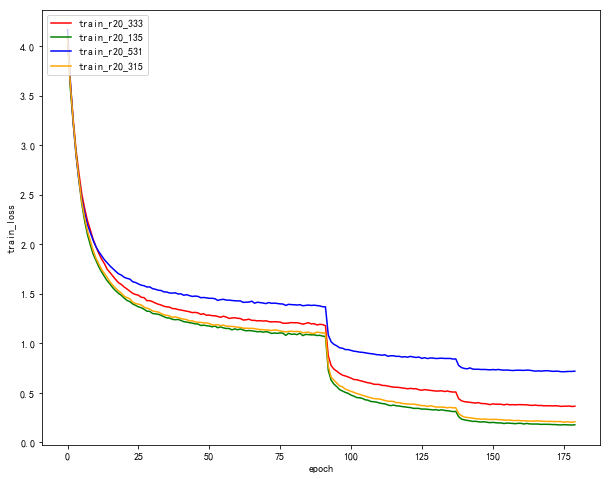

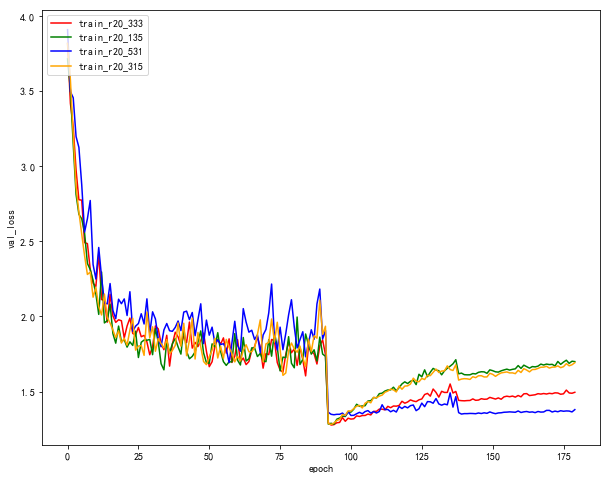

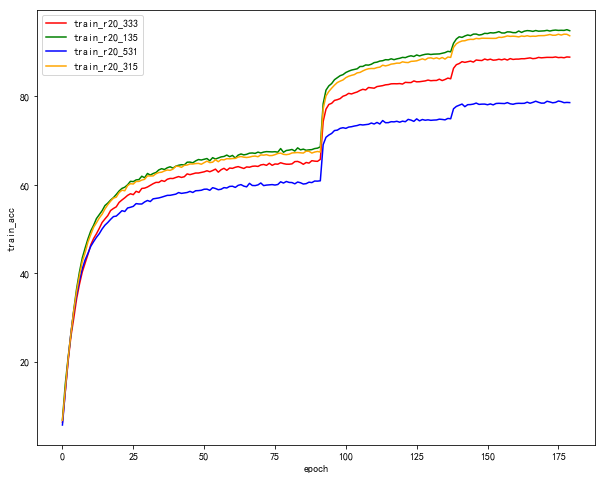

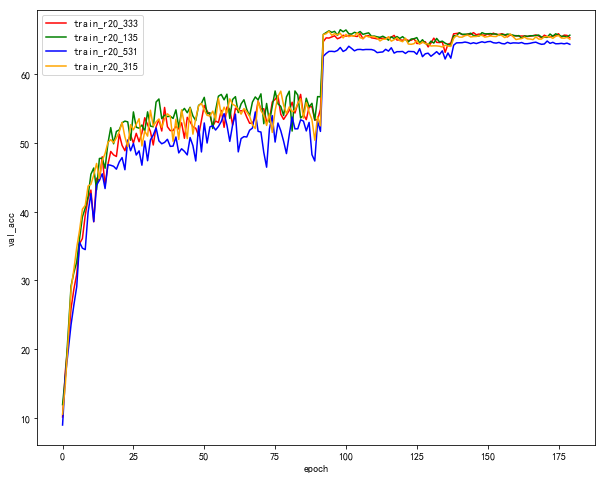

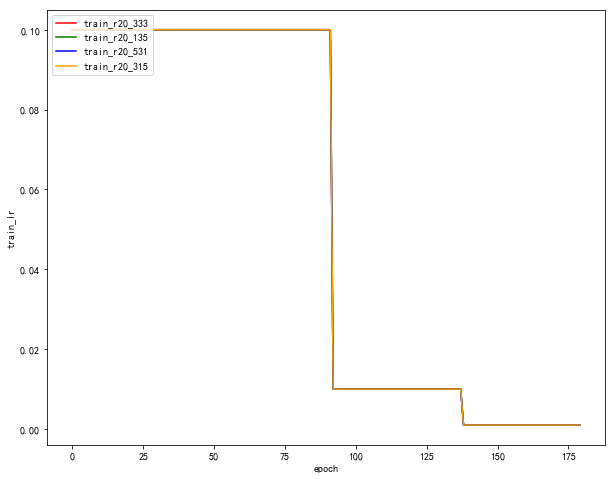

In [4]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

legend_stages = ['train_r20_333', 'train_r20_135', 'train_r20_531', 'train_r20_315']

plt_different_history(history_stages, legend_stages)

## The basic training and testing pipeline
### What if we train residual networks with 50 or 62 layers? How do they compare against the network with 56 layers?
* `layer_values = [[9, 9, 9], [8, 8, 8], [10, 10, 10]]` - define ResNet56 & ResNet50 & ResNet62
* `history_50_62 = []` - define train/validation logs' container
* `auto_resnet(layer_j, 100, 1, 180, history_50_62)`:
    * `100` - CIFAR100 dataset
    * `1` - learning rate multiplier (base learning rate is 1*0.1)
    * `180` - number of epochs

In [5]:
%%time
from auto_resnet import * 

layer_values = [[9, 9, 9], [8, 8, 8], [10, 10, 10]] # 56, 50, 62
history_50_62 = []

for layer_j in layer_values:
    auto_resnet(layer_j, 100, 1, 180, history_50_62)

_ResNet(
  (conv1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
  )
  (layer1): Sequential(
    (0): _BasicBlock(
      (conv_bn_relu1): Sequential(
        (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace)
      )
      (conv_bn2): Sequential(
        (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (relu_out): ReLU(inplace)
    )
    (1): _BasicBlock(
      (conv_bn_relu1): Sequential(
        (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affi

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Epoch: 1/180, lr:1.00e-01
100%|██████████| 625/625 [00:28<00:00, 21.70it/s, loss:4.2792, acc:4.5900%]
Val loss: 4.0326, accuracy: 8.18%
Epoch: 2/180, lr:1.00e-01
100%|██████████| 625/625 [00:28<00:00, 21.89it/s, loss:3.7737, acc:11.3925%]
Val loss: 3.6652, accuracy: 13.28%
Epoch: 3/180, lr:1.00e-01
100%|██████████| 625/625 [00:28<00:00, 22.10it/s, loss:3.3786, acc:17.9350%]
Val loss: 3.3538, accuracy: 19.50%
Epoch: 4/180, lr:1.00e-01
100%|██████████| 625/625 [00:28<00:00, 21.88it/s, loss:3.0681, acc:23.6550%]
Val loss: 3.0287, accuracy: 25.34%
Epoch: 5/180, lr:1.00e-01
100%|██████████| 625/625 [00:28<00:00, 22.04it/s, loss:2.8001, acc:28.9150%]
Val loss: 2.8474, accuracy: 29.44%
Epoch: 6/180, lr:1.00e-01
100%|██████████| 625/625 [00:28<00:00, 21.70it/s, loss:2.5479, acc:33.8800%]
Val loss: 2.5508, accuracy: 34.36%
Epoch: 7/180, lr:1.00e-01
100%|██████████| 625/625 [00:28<00

100%|██████████| 625/625 [00:28<00:00, 22.15it/s, loss:0.1666, acc:94.8875%]
Val loss: 1.5948, accuracy: 67.75%
Epoch: 119/180, lr:1.00e-02
100%|██████████| 625/625 [00:28<00:00, 21.91it/s, loss:0.1605, acc:95.1075%]
Val loss: 1.6305, accuracy: 67.73%
Epoch: 120/180, lr:1.00e-02
100%|██████████| 625/625 [00:28<00:00, 21.87it/s, loss:0.1570, acc:95.0925%]
Val loss: 1.6148, accuracy: 68.41%
Epoch: 121/180, lr:1.00e-02
100%|██████████| 625/625 [00:28<00:00, 21.80it/s, loss:0.1518, acc:95.4300%]
Val loss: 1.6655, accuracy: 67.91%
Epoch: 122/180, lr:1.00e-02
100%|██████████| 625/625 [00:28<00:00, 21.84it/s, loss:0.1493, acc:95.5650%]
Val loss: 1.6566, accuracy: 67.40%
Epoch: 123/180, lr:1.00e-02
100%|██████████| 625/625 [00:28<00:00, 21.88it/s, loss:0.1465, acc:95.4000%]
Val loss: 1.6670, accuracy: 67.51%
Epoch: 124/180, lr:1.00e-02
100%|██████████| 625/625 [00:28<00:00, 21.88it/s, loss:0.1429, acc:95.7100%]
Val loss: 1.6559, accuracy: 67.75%
Epoch: 125/180, lr:1.00e-02
100%|██████████| 625

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Epoch: 1/180, lr:1.00e-01
100%|██████████| 625/625 [00:25<00:00, 24.40it/s, loss:4.1910, acc:5.1475%]
Val loss: 3.8646, accuracy: 9.32%
Epoch: 2/180, lr:1.00e-01
100%|██████████| 625/625 [00:25<00:00, 24.35it/s, loss:3.6941, acc:12.4200%]
Val loss: 3.5927, accuracy: 14.46%
Epoch: 3/180, lr:1.00e-01
100%|██████████| 625/625 [00:25<00:00, 24.30it/s, loss:3.2892, acc:19.1625%]
Val loss: 3.1217, accuracy: 23.02%
Epoch: 4/180, lr:1.00e-01
100%|██████████| 625/625 [00:25<00:00, 24.17it/s, loss:2.9152, acc:25.9450%]
Val loss: 2.8286, accuracy: 28.73%
Epoch: 5/180, lr:1.00e-01
100%|██████████| 625/625 [00:25<00:00, 24.05it/s, loss:2.6432, acc:31.5075%]
Val loss: 2.7545, accuracy: 30.68%
Epoch: 6/180, lr:1.00e-01
100%|██████████| 625/625 [00:26<00:00, 23.87it/s, loss:2.4229, acc:36.1450%]
Val loss: 2.6204, accuracy: 33.86%
Epoch: 7/180, lr:1.00e-01
100%|██████████| 625/625 [00:25<00

100%|██████████| 625/625 [00:25<00:00, 24.17it/s, loss:0.1800, acc:94.3450%]
Val loss: 1.5686, accuracy: 67.85%
Epoch: 120/180, lr:1.00e-02
100%|██████████| 625/625 [00:26<00:00, 24.01it/s, loss:0.1810, acc:94.2975%]
Val loss: 1.5464, accuracy: 68.15%
Epoch: 121/180, lr:1.00e-02
100%|██████████| 625/625 [00:26<00:00, 23.87it/s, loss:0.1782, acc:94.4250%]
Val loss: 1.5654, accuracy: 68.06%
Epoch: 122/180, lr:1.00e-02
100%|██████████| 625/625 [00:25<00:00, 24.26it/s, loss:0.1777, acc:94.5050%]
Val loss: 1.6025, accuracy: 67.86%
Epoch: 123/180, lr:1.00e-02
100%|██████████| 625/625 [00:25<00:00, 24.33it/s, loss:0.1717, acc:94.7425%]
Val loss: 1.6061, accuracy: 67.46%
Epoch: 124/180, lr:1.00e-02
100%|██████████| 625/625 [00:26<00:00, 23.99it/s, loss:0.1731, acc:94.6425%]
Val loss: 1.6029, accuracy: 67.74%
Epoch: 125/180, lr:1.00e-02
100%|██████████| 625/625 [00:25<00:00, 24.56it/s, loss:0.1653, acc:94.8975%]
Val loss: 1.5906, accuracy: 67.96%
Epoch: 126/180, lr:1.00e-02
100%|██████████| 625

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Epoch: 1/180, lr:1.00e-01
100%|██████████| 625/625 [00:31<00:00, 19.94it/s, loss:4.2370, acc:4.6500%]
Val loss: 3.9236, accuracy: 8.36%
Epoch: 2/180, lr:1.00e-01
100%|██████████| 625/625 [00:31<00:00, 20.05it/s, loss:3.6993, acc:12.4825%]
Val loss: 3.6372, accuracy: 14.72%
Epoch: 3/180, lr:1.00e-01
100%|██████████| 625/625 [00:31<00:00, 19.99it/s, loss:3.2304, acc:20.2175%]
Val loss: 3.1362, accuracy: 23.01%
Epoch: 4/180, lr:1.00e-01
100%|██████████| 625/625 [00:31<00:00, 20.04it/s, loss:2.8380, acc:27.4850%]
Val loss: 2.9158, accuracy: 27.22%
Epoch: 5/180, lr:1.00e-01
100%|██████████| 625/625 [00:31<00:00, 19.95it/s, loss:2.5430, acc:33.4850%]
Val loss: 3.3958, accuracy: 24.24%
Epoch: 6/180, lr:1.00e-01
100%|██████████| 625/625 [00:31<00:00, 20.04it/s, loss:2.3127, acc:38.4075%]
Val loss: 2.4714, accuracy: 35.89%
Epoch: 7/180, lr:1.00e-01
100%|██████████| 625/625 [00:31<00

100%|██████████| 625/625 [00:31<00:00, 19.86it/s, loss:0.1326, acc:95.9975%]
Val loss: 1.5869, accuracy: 68.76%
Epoch: 119/180, lr:1.00e-02
100%|██████████| 625/625 [00:31<00:00, 19.82it/s, loss:0.1249, acc:96.2875%]
Val loss: 1.5969, accuracy: 68.35%
Epoch: 120/180, lr:1.00e-02
100%|██████████| 625/625 [00:31<00:00, 19.97it/s, loss:0.1243, acc:96.2850%]
Val loss: 1.6011, accuracy: 67.87%
Epoch: 121/180, lr:1.00e-02
100%|██████████| 625/625 [00:31<00:00, 20.00it/s, loss:0.1174, acc:96.4825%]
Val loss: 1.5985, accuracy: 68.77%
Epoch: 122/180, lr:1.00e-02
100%|██████████| 625/625 [00:31<00:00, 19.98it/s, loss:0.1185, acc:96.4200%]
Val loss: 1.6131, accuracy: 68.66%
Epoch: 123/180, lr:1.00e-02
100%|██████████| 625/625 [00:31<00:00, 20.10it/s, loss:0.1153, acc:96.4825%]
Val loss: 1.6786, accuracy: 68.15%
Epoch: 124/180, lr:1.00e-02
100%|██████████| 625/625 [00:31<00:00, 20.09it/s, loss:0.1134, acc:96.6025%]
Val loss: 1.6360, accuracy: 68.44%
Epoch: 125/180, lr:1.00e-02
100%|██████████| 625

## Plot results

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


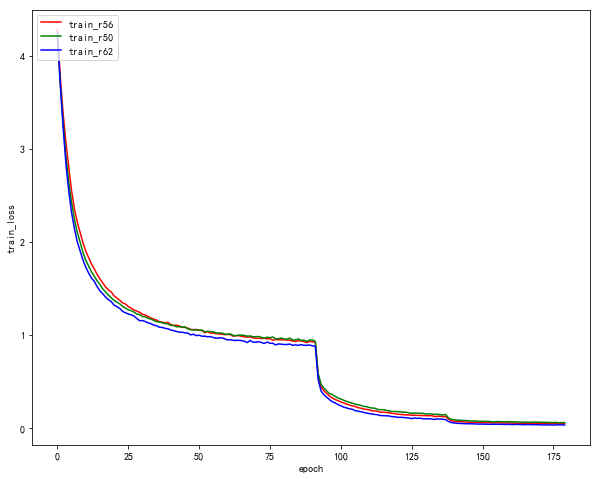

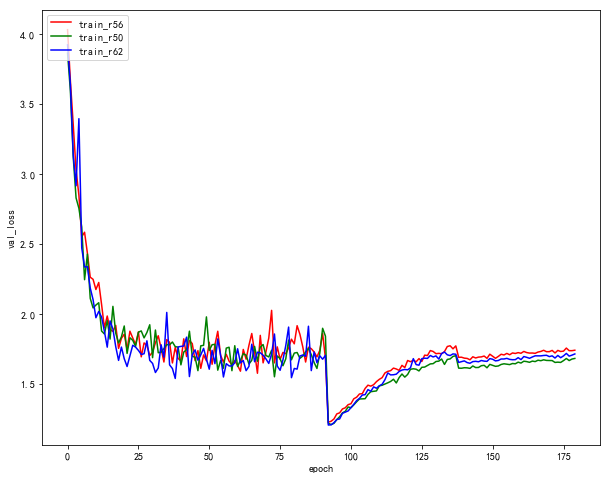

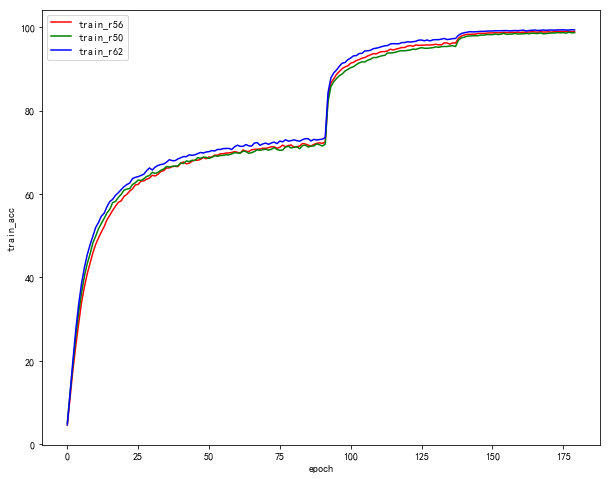

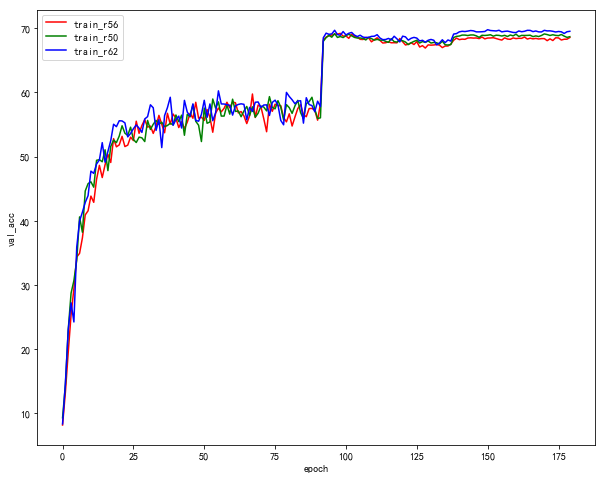

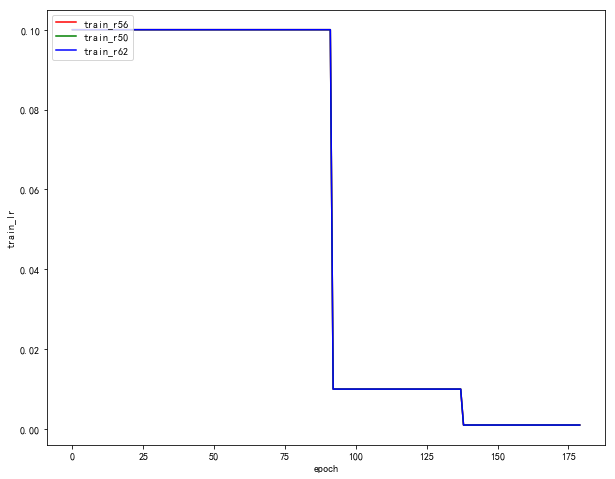

In [6]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

legend_50_62 = ['train_r56', 'train_r50', 'train_r62']

plt_different_history(history_50_62, legend_50_62)

## The basic training and testing pipeline
### What if we remove all skip connections in residual networks? What if we add a skip connection after each 1 or 3 (not 2) convolutional layers? For fair comparison, please keep the number of convlayers unchanged.
* `rm_conn_values = [True, False]` - define skipconnection flags (True - remove all skip connections in residual network, False - leave all skip connections in residual network; base flaf is False)
* `conv_num_values = [1, 2, 3]` - define number of conv layers inside residual block (base number is 2)
* `history_structure = []` - define train/validation logs' container
* `auto_resnet([3,3,3], 100, 1, 180, history_structure, 0.8, 64, conv_num_j, rm_conn_i)`:
    * `[3,3,3]` - ResNet20 model
    * `100` - CIFAR100 dataset
    * `1` - learning rate multiplier (base learning rate is 1*0.1)
    * `180` - number of epochs
    * `0.8` - data parts multiplier (base ratio train/validation sub datasets is 0.8/0.2)
    * `64` - batch size valuse (base batch size is 64)

In [5]:
%%time
from auto_resnet import * 

rm_conn_values = [True, False]
conv_num_values = [1, 2, 3]
layer_values = [[6, 6, 6], [3, 3, 3], [2, 2, 2]] 
history_structure = []

for rm_conn_i in rm_conn_values:
    for conv_num_j, layer_values_j in zip(conv_num_values,layer_values) :
        auto_resnet(layer_values_j, 100, 1, 180, history_structure, 0.8, 64, conv_num_j, rm_conn_i)

_ResNet(
  (conv1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
  )
  (layer1): Sequential(
    (0): _BasicBlock(
      (conv_bn1): Sequential(
        (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (relu_out): ReLU(inplace)
    )
    (1): _BasicBlock(
      (conv_bn1): Sequential(
        (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (relu_out): ReLU(inplace)
    )
    (2): _BasicBlock(
      (conv_bn1): Sequential(
        (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=1e

100%|██████████| 625/625 [00:12<00:00, 51.64it/s, loss:2.2049, acc:41.0700%]
Val loss: 2.7313, accuracy: 33.66%
Epoch: 17/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 52.01it/s, loss:2.1536, acc:42.3875%]
Val loss: 2.6209, accuracy: 35.12%
Epoch: 18/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 51.34it/s, loss:2.1103, acc:43.3350%]
Val loss: 2.4756, accuracy: 37.53%
Epoch: 19/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 51.85it/s, loss:2.0705, acc:44.5125%]
Val loss: 2.5128, accuracy: 37.58%
Epoch: 20/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 51.65it/s, loss:2.0411, acc:44.8075%]
Val loss: 2.6851, accuracy: 33.43%
Epoch: 21/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 51.82it/s, loss:2.0052, acc:45.9925%]
Val loss: 2.4273, accuracy: 39.66%
Epoch: 22/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 51.86it/s, loss:1.9815, acc:46.1800%]
Val loss: 2.5144, accuracy: 36.78%
Epoch: 23/180, lr:1.00e-01
100%|██████████| 625/625 [0

100%|██████████| 625/625 [00:12<00:00, 51.57it/s, loss:1.5076, acc:57.4175%]
Val loss: 2.1084, accuracy: 46.61%
Epoch: 76/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 50.37it/s, loss:1.5080, acc:57.3100%]
Val loss: 2.2346, accuracy: 45.82%
Epoch: 77/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 51.60it/s, loss:1.5025, acc:57.1750%]
Val loss: 2.2181, accuracy: 44.08%
Epoch: 78/180, lr:1.00e-01
100%|██████████| 625/625 [00:11<00:00, 52.18it/s, loss:1.4834, acc:58.1525%]
Val loss: 2.4104, accuracy: 41.23%
Epoch: 79/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 51.45it/s, loss:1.4971, acc:57.8125%]
Val loss: 2.1886, accuracy: 45.69%
Epoch: 80/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 50.93it/s, loss:1.4897, acc:57.8275%]
Val loss: 2.7906, accuracy: 38.40%
Epoch: 81/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 51.75it/s, loss:1.4867, acc:58.0225%]
Val loss: 1.8342, accuracy: 52.08%
Epoch: 82/180, lr:1.00e-01
100%|██████████| 625/625 [0

100%|██████████| 625/625 [00:12<00:00, 51.24it/s, loss:0.7501, acc:77.0025%]
Val loss: 1.6085, accuracy: 60.60%
Epoch: 135/180, lr:1.00e-02
100%|██████████| 625/625 [00:12<00:00, 50.84it/s, loss:0.7505, acc:76.7800%]
Val loss: 1.5861, accuracy: 60.47%
Epoch: 136/180, lr:1.00e-02
100%|██████████| 625/625 [00:12<00:00, 50.89it/s, loss:0.7434, acc:77.4150%]
Val loss: 1.6619, accuracy: 59.82%
Epoch: 137/180, lr:1.00e-02
100%|██████████| 625/625 [00:12<00:00, 49.77it/s, loss:0.7412, acc:77.2425%]
Val loss: 1.5723, accuracy: 60.58%
Epoch: 138/180, lr:1.00e-02
100%|██████████| 625/625 [00:12<00:00, 49.52it/s, loss:0.7480, acc:76.9825%]
Val loss: 1.6340, accuracy: 59.64%
Epoch: 139/180, lr:1.00e-03
100%|██████████| 625/625 [00:12<00:00, 51.75it/s, loss:0.6633, acc:79.8200%]
Val loss: 1.5143, accuracy: 62.29%
Epoch: 140/180, lr:1.00e-03
100%|██████████| 625/625 [00:12<00:00, 50.21it/s, loss:0.6327, acc:80.8250%]
Val loss: 1.5127, accuracy: 62.12%
Epoch: 141/180, lr:1.00e-03
100%|██████████| 625

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Epoch: 1/180, lr:1.00e-01
100%|██████████| 625/625 [00:11<00:00, 52.39it/s, loss:4.2847, acc:3.9725%]
Val loss: 4.1776, accuracy: 5.33%
Epoch: 2/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 51.12it/s, loss:3.9950, acc:7.0925%]
Val loss: 3.9241, accuracy: 8.47%
Epoch: 3/180, lr:1.00e-01
100%|██████████| 625/625 [00:11<00:00, 52.11it/s, loss:3.8029, acc:9.8725%]
Val loss: 3.7946, accuracy: 10.53%
Epoch: 4/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 51.62it/s, loss:3.6219, acc:13.1900%]
Val loss: 3.5816, accuracy: 13.49%
Epoch: 5/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 48.73it/s, loss:3.4547, acc:15.7325%]
Val loss: 3.4928, accuracy: 15.69%
Epoch: 6/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 49.49it/s, loss:3.2645, acc:19.1225%]
Val loss: 3.6324, accuracy: 14.83%
Epoch: 7/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00

100%|██████████| 625/625 [00:12<00:00, 50.21it/s, loss:1.5687, acc:55.8100%]
Val loss: 1.9512, accuracy: 49.06%
Epoch: 60/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 50.31it/s, loss:1.5690, acc:55.8550%]
Val loss: 1.9168, accuracy: 49.69%
Epoch: 61/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 50.12it/s, loss:1.5607, acc:56.0325%]
Val loss: 2.0504, accuracy: 47.73%
Epoch: 62/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 50.25it/s, loss:1.5594, acc:56.0875%]
Val loss: 1.9482, accuracy: 49.66%
Epoch: 63/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 50.41it/s, loss:1.5436, acc:56.2375%]
Val loss: 1.9476, accuracy: 49.42%
Epoch: 64/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 49.51it/s, loss:1.5505, acc:56.2150%]
Val loss: 1.8878, accuracy: 49.59%
Epoch: 65/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 49.73it/s, loss:1.5421, acc:56.4700%]
Val loss: 2.1699, accuracy: 46.57%
Epoch: 66/180, lr:1.00e-01
100%|██████████| 625/625 [0

100%|██████████| 625/625 [00:12<00:00, 49.37it/s, loss:0.7819, acc:76.0950%]
Val loss: 1.4912, accuracy: 62.10%
Epoch: 119/180, lr:1.00e-02
100%|██████████| 625/625 [00:12<00:00, 49.42it/s, loss:0.7743, acc:76.2950%]
Val loss: 1.5137, accuracy: 61.26%
Epoch: 120/180, lr:1.00e-02
100%|██████████| 625/625 [00:12<00:00, 50.48it/s, loss:0.7752, acc:76.1650%]
Val loss: 1.4938, accuracy: 61.97%
Epoch: 121/180, lr:1.00e-02
100%|██████████| 625/625 [00:12<00:00, 50.37it/s, loss:0.7727, acc:76.3650%]
Val loss: 1.5202, accuracy: 61.86%
Epoch: 122/180, lr:1.00e-02
100%|██████████| 625/625 [00:12<00:00, 49.50it/s, loss:0.7668, acc:76.5025%]
Val loss: 1.5116, accuracy: 61.54%
Epoch: 123/180, lr:1.00e-02
100%|██████████| 625/625 [00:12<00:00, 49.32it/s, loss:0.7636, acc:76.6000%]
Val loss: 1.5201, accuracy: 61.82%
Epoch: 124/180, lr:1.00e-02
100%|██████████| 625/625 [00:12<00:00, 50.33it/s, loss:0.7632, acc:76.6700%]
Val loss: 1.5038, accuracy: 61.59%
Epoch: 125/180, lr:1.00e-02
100%|██████████| 625

100%|██████████| 625/625 [00:12<00:00, 49.37it/s, loss:0.5596, acc:82.8000%]
Val loss: 1.5240, accuracy: 63.20%
Epoch: 177/180, lr:1.00e-03
100%|██████████| 625/625 [00:12<00:00, 49.18it/s, loss:0.5571, acc:82.9750%]
Val loss: 1.5492, accuracy: 63.24%
Epoch: 178/180, lr:1.00e-03
100%|██████████| 625/625 [00:12<00:00, 49.67it/s, loss:0.5588, acc:82.6000%]
Val loss: 1.5418, accuracy: 62.81%
Epoch: 179/180, lr:1.00e-03
100%|██████████| 625/625 [00:12<00:00, 49.97it/s, loss:0.5578, acc:82.8125%]
Val loss: 1.5417, accuracy: 63.34%
Epoch: 180/180, lr:1.00e-03
100%|██████████| 625/625 [00:12<00:00, 50.34it/s, loss:0.5604, acc:82.6650%]
Val loss: 1.5469, accuracy: 62.83%
Test loss: 1.5284, accuracy: 63.12%
_ResNet(
  (conv1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
  )
  (layer1): Sequential(
    (0): _BasicBlock(
      (conv_

100%|██████████| 625/625 [00:12<00:00, 50.44it/s, loss:2.2966, acc:39.0075%]
Val loss: 2.4693, accuracy: 36.18%
Epoch: 15/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 49.32it/s, loss:2.2359, acc:40.3675%]
Val loss: 3.0217, accuracy: 28.54%
Epoch: 16/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 49.61it/s, loss:2.1782, acc:41.5825%]
Val loss: 2.8442, accuracy: 31.72%
Epoch: 17/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 49.61it/s, loss:2.1270, acc:42.8250%]
Val loss: 2.3087, accuracy: 40.04%
Epoch: 18/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 49.81it/s, loss:2.0828, acc:43.8150%]
Val loss: 2.3787, accuracy: 39.30%
Epoch: 19/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 49.16it/s, loss:2.0441, acc:44.7475%]
Val loss: 2.6133, accuracy: 35.95%
Epoch: 20/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 50.50it/s, loss:2.0141, acc:45.4325%]
Val loss: 2.4559, accuracy: 38.61%
Epoch: 21/180, lr:1.00e-01
100%|██████████| 625/625 [0

100%|██████████| 625/625 [00:12<00:00, 50.07it/s, loss:1.4857, acc:58.1750%]
Val loss: 2.1086, accuracy: 46.81%
Epoch: 74/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 50.61it/s, loss:1.4764, acc:58.0500%]
Val loss: 2.1065, accuracy: 46.79%
Epoch: 75/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 49.59it/s, loss:1.4787, acc:57.9800%]
Val loss: 2.0749, accuracy: 47.13%
Epoch: 76/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 49.41it/s, loss:1.4715, acc:58.0425%]
Val loss: 2.2194, accuracy: 46.81%
Epoch: 77/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 49.63it/s, loss:1.4762, acc:58.1350%]
Val loss: 2.4429, accuracy: 42.10%
Epoch: 78/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 50.99it/s, loss:1.4614, acc:58.5400%]
Val loss: 2.0593, accuracy: 47.27%
Epoch: 79/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 49.67it/s, loss:1.4694, acc:58.2275%]
Val loss: 2.4219, accuracy: 42.79%
Epoch: 80/180, lr:1.00e-01
100%|██████████| 625/625 [0

100%|██████████| 625/625 [00:12<00:00, 50.21it/s, loss:0.7227, acc:77.9250%]
Val loss: 1.5524, accuracy: 61.63%
Epoch: 133/180, lr:1.00e-02
100%|██████████| 625/625 [00:12<00:00, 51.53it/s, loss:0.7284, acc:77.7700%]
Val loss: 1.5363, accuracy: 61.90%
Epoch: 134/180, lr:1.00e-02
100%|██████████| 625/625 [00:12<00:00, 49.21it/s, loss:0.7228, acc:77.9550%]
Val loss: 1.5584, accuracy: 61.31%
Epoch: 135/180, lr:1.00e-02
100%|██████████| 625/625 [00:12<00:00, 50.24it/s, loss:0.7277, acc:77.3775%]
Val loss: 1.5426, accuracy: 61.81%
Epoch: 136/180, lr:1.00e-02
100%|██████████| 625/625 [00:12<00:00, 49.32it/s, loss:0.7245, acc:77.8200%]
Val loss: 1.5786, accuracy: 61.49%
Epoch: 137/180, lr:1.00e-02
100%|██████████| 625/625 [00:12<00:00, 49.87it/s, loss:0.7197, acc:77.8225%]
Val loss: 1.5126, accuracy: 61.95%
Epoch: 138/180, lr:1.00e-02
100%|██████████| 625/625 [00:12<00:00, 49.86it/s, loss:0.7179, acc:77.9875%]
Val loss: 1.5824, accuracy: 60.66%
Epoch: 139/180, lr:1.00e-03
100%|██████████| 625

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Epoch: 1/180, lr:1.00e-01
100%|██████████| 625/625 [00:13<00:00, 45.57it/s, loss:4.1156, acc:6.0975%]
Val loss: 3.8402, accuracy: 9.89%
Epoch: 2/180, lr:1.00e-01
100%|██████████| 625/625 [00:13<00:00, 45.42it/s, loss:3.6252, acc:13.4175%]
Val loss: 3.4678, accuracy: 15.71%
Epoch: 3/180, lr:1.00e-01
100%|██████████| 625/625 [00:13<00:00, 46.54it/s, loss:3.2686, acc:19.5750%]
Val loss: 3.2236, accuracy: 21.26%
Epoch: 4/180, lr:1.00e-01
100%|██████████| 625/625 [00:13<00:00, 45.96it/s, loss:2.9854, acc:25.0100%]
Val loss: 3.0525, accuracy: 24.98%
Epoch: 5/180, lr:1.00e-01
100%|██████████| 625/625 [00:13<00:00, 45.76it/s, loss:2.7800, acc:29.1000%]
Val loss: 2.8548, accuracy: 28.88%
Epoch: 6/180, lr:1.00e-01
100%|██████████| 625/625 [00:13<00:00, 45.87it/s, loss:2.6019, acc:32.7700%]
Val loss: 2.8440, accuracy: 29.92%
Epoch: 7/180, lr:1.00e-01
100%|██████████| 625/625 [00:13<00

100%|██████████| 625/625 [00:13<00:00, 45.69it/s, loss:1.4472, acc:58.9600%]
Val loss: 1.7916, accuracy: 52.36%
Epoch: 60/180, lr:1.00e-01
100%|██████████| 625/625 [00:13<00:00, 45.72it/s, loss:1.4285, acc:59.1275%]
Val loss: 1.8748, accuracy: 51.92%
Epoch: 61/180, lr:1.00e-01
100%|██████████| 625/625 [00:13<00:00, 45.78it/s, loss:1.4342, acc:59.2050%]
Val loss: 1.8383, accuracy: 51.39%
Epoch: 62/180, lr:1.00e-01
100%|██████████| 625/625 [00:13<00:00, 45.88it/s, loss:1.4369, acc:58.9750%]
Val loss: 1.8413, accuracy: 51.53%
Epoch: 63/180, lr:1.00e-01
100%|██████████| 625/625 [00:13<00:00, 46.27it/s, loss:1.4204, acc:59.3900%]
Val loss: 1.7848, accuracy: 52.72%
Epoch: 64/180, lr:1.00e-01
100%|██████████| 625/625 [00:13<00:00, 46.12it/s, loss:1.4269, acc:59.2300%]
Val loss: 1.7334, accuracy: 53.86%
Epoch: 65/180, lr:1.00e-01
100%|██████████| 625/625 [00:13<00:00, 46.50it/s, loss:1.4204, acc:59.3875%]
Val loss: 1.7960, accuracy: 52.13%
Epoch: 66/180, lr:1.00e-01
100%|██████████| 625/625 [0

100%|██████████| 625/625 [00:13<00:00, 46.33it/s, loss:0.7370, acc:77.6450%]
Val loss: 1.4741, accuracy: 62.72%
Epoch: 119/180, lr:1.00e-02
100%|██████████| 625/625 [00:13<00:00, 45.68it/s, loss:0.7306, acc:77.6975%]
Val loss: 1.4765, accuracy: 62.97%
Epoch: 120/180, lr:1.00e-02
100%|██████████| 625/625 [00:13<00:00, 46.30it/s, loss:0.7348, acc:77.6125%]
Val loss: 1.4957, accuracy: 62.48%
Epoch: 121/180, lr:1.00e-02
100%|██████████| 625/625 [00:13<00:00, 45.42it/s, loss:0.7302, acc:77.8000%]
Val loss: 1.4772, accuracy: 63.04%
Epoch: 122/180, lr:1.00e-02
100%|██████████| 625/625 [00:13<00:00, 45.27it/s, loss:0.7291, acc:77.8650%]
Val loss: 1.5012, accuracy: 62.28%
Epoch: 123/180, lr:1.00e-02
100%|██████████| 625/625 [00:13<00:00, 46.35it/s, loss:0.7281, acc:77.6575%]
Val loss: 1.5174, accuracy: 62.08%
Epoch: 124/180, lr:1.00e-02
100%|██████████| 625/625 [00:13<00:00, 45.92it/s, loss:0.7237, acc:77.7725%]
Val loss: 1.4989, accuracy: 62.09%
Epoch: 125/180, lr:1.00e-02
100%|██████████| 625

100%|██████████| 625/625 [00:13<00:00, 46.40it/s, loss:0.5397, acc:83.6275%]
Val loss: 1.5112, accuracy: 63.41%
Epoch: 177/180, lr:1.00e-03
100%|██████████| 625/625 [00:13<00:00, 45.97it/s, loss:0.5362, acc:83.5250%]
Val loss: 1.5329, accuracy: 63.31%
Epoch: 178/180, lr:1.00e-03
100%|██████████| 625/625 [00:13<00:00, 45.00it/s, loss:0.5349, acc:83.7350%]
Val loss: 1.5224, accuracy: 63.11%
Epoch: 179/180, lr:1.00e-03
100%|██████████| 625/625 [00:13<00:00, 45.89it/s, loss:0.5358, acc:83.4950%]
Val loss: 1.5189, accuracy: 63.11%
Epoch: 180/180, lr:1.00e-03
100%|██████████| 625/625 [00:13<00:00, 45.77it/s, loss:0.5398, acc:83.6100%]
Val loss: 1.5280, accuracy: 62.99%
Test loss: 1.5030, accuracy: 63.22%
_ResNet(
  (conv1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
  )
  (layer1): Sequential(
    (0): _BasicBlock(
      (conv_

100%|██████████| 625/625 [00:13<00:00, 47.49it/s, loss:1.7825, acc:50.5775%]
Val loss: 1.9788, accuracy: 47.25%
Epoch: 14/180, lr:1.00e-01
100%|██████████| 625/625 [00:13<00:00, 46.35it/s, loss:1.7443, acc:51.6375%]
Val loss: 2.0342, accuracy: 45.74%
Epoch: 15/180, lr:1.00e-01
100%|██████████| 625/625 [00:13<00:00, 47.27it/s, loss:1.6945, acc:52.6425%]
Val loss: 2.1804, accuracy: 45.23%
Epoch: 16/180, lr:1.00e-01
100%|██████████| 625/625 [00:13<00:00, 46.62it/s, loss:1.6618, acc:53.6450%]
Val loss: 2.2452, accuracy: 43.35%
Epoch: 17/180, lr:1.00e-01
100%|██████████| 625/625 [00:13<00:00, 46.24it/s, loss:1.6328, acc:54.2500%]
Val loss: 1.9688, accuracy: 48.19%
Epoch: 18/180, lr:1.00e-01
100%|██████████| 625/625 [00:13<00:00, 46.85it/s, loss:1.5969, acc:55.3150%]
Val loss: 1.9449, accuracy: 49.31%
Epoch: 19/180, lr:1.00e-01
100%|██████████| 625/625 [00:13<00:00, 47.56it/s, loss:1.5736, acc:55.7100%]
Val loss: 1.8357, accuracy: 52.11%
Epoch: 20/180, lr:1.00e-01
100%|██████████| 625/625 [0

100%|██████████| 625/625 [00:13<00:00, 46.96it/s, loss:1.2138, acc:64.5475%]
Val loss: 1.7070, accuracy: 55.68%
Epoch: 73/180, lr:1.00e-01
100%|██████████| 625/625 [00:13<00:00, 47.62it/s, loss:1.2127, acc:65.0075%]
Val loss: 1.8655, accuracy: 54.30%
Epoch: 74/180, lr:1.00e-01
100%|██████████| 625/625 [00:13<00:00, 47.09it/s, loss:1.2068, acc:65.0150%]
Val loss: 1.6585, accuracy: 56.23%
Epoch: 75/180, lr:1.00e-01
100%|██████████| 625/625 [00:13<00:00, 46.92it/s, loss:1.2072, acc:64.7750%]
Val loss: 1.8279, accuracy: 53.48%
Epoch: 76/180, lr:1.00e-01
100%|██████████| 625/625 [00:13<00:00, 46.59it/s, loss:1.2116, acc:64.5175%]
Val loss: 1.7335, accuracy: 54.82%
Epoch: 77/180, lr:1.00e-01
100%|██████████| 625/625 [00:13<00:00, 46.94it/s, loss:1.2113, acc:64.7425%]
Val loss: 1.6819, accuracy: 55.49%
Epoch: 78/180, lr:1.00e-01
100%|██████████| 625/625 [00:13<00:00, 47.37it/s, loss:1.1968, acc:65.1575%]
Val loss: 1.8228, accuracy: 53.42%
Epoch: 79/180, lr:1.00e-01
100%|██████████| 625/625 [0

100%|██████████| 625/625 [00:13<00:00, 46.74it/s, loss:0.5148, acc:83.8350%]
Val loss: 1.4952, accuracy: 64.93%
Epoch: 132/180, lr:1.00e-02
100%|██████████| 625/625 [00:13<00:00, 46.14it/s, loss:0.5133, acc:83.9025%]
Val loss: 1.4812, accuracy: 64.60%
Epoch: 133/180, lr:1.00e-02
100%|██████████| 625/625 [00:13<00:00, 46.89it/s, loss:0.5149, acc:83.7350%]
Val loss: 1.5135, accuracy: 64.18%
Epoch: 134/180, lr:1.00e-02
100%|██████████| 625/625 [00:13<00:00, 46.74it/s, loss:0.5109, acc:83.9175%]
Val loss: 1.4959, accuracy: 63.97%
Epoch: 135/180, lr:1.00e-02
100%|██████████| 625/625 [00:12<00:00, 48.80it/s, loss:0.5058, acc:84.0575%]
Val loss: 1.4915, accuracy: 64.61%
Epoch: 136/180, lr:1.00e-02
100%|██████████| 625/625 [00:13<00:00, 47.35it/s, loss:0.5073, acc:84.1300%]
Val loss: 1.5436, accuracy: 64.30%
Epoch: 137/180, lr:1.00e-02
100%|██████████| 625/625 [00:13<00:00, 46.41it/s, loss:0.5031, acc:84.0775%]
Val loss: 1.4946, accuracy: 64.48%
Epoch: 138/180, lr:1.00e-02
100%|██████████| 625

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Epoch: 1/180, lr:1.00e-01
100%|██████████| 625/625 [00:13<00:00, 47.01it/s, loss:4.1035, acc:6.5900%]
Val loss: 3.9264, accuracy: 10.07%
Epoch: 2/180, lr:1.00e-01
100%|██████████| 625/625 [00:13<00:00, 46.99it/s, loss:3.5871, acc:14.4150%]
Val loss: 3.5100, accuracy: 16.68%
Epoch: 3/180, lr:1.00e-01
100%|██████████| 625/625 [00:13<00:00, 47.27it/s, loss:3.2580, acc:19.9475%]
Val loss: 3.2264, accuracy: 21.11%
Epoch: 4/180, lr:1.00e-01
100%|██████████| 625/625 [00:13<00:00, 46.95it/s, loss:2.9841, acc:25.0125%]
Val loss: 3.1282, accuracy: 23.94%
Epoch: 5/180, lr:1.00e-01
100%|██████████| 625/625 [00:13<00:00, 47.39it/s, loss:2.7578, acc:29.4150%]
Val loss: 2.7546, accuracy: 30.03%
Epoch: 6/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 48.47it/s, loss:2.5551, acc:33.5425%]
Val loss: 2.8803, accuracy: 29.98%
Epoch: 7/180, lr:1.00e-01
100%|██████████| 625/625 [00:13<0

100%|██████████| 625/625 [00:12<00:00, 48.17it/s, loss:1.2511, acc:63.7700%]
Val loss: 1.7237, accuracy: 55.43%
Epoch: 61/180, lr:1.00e-01
100%|██████████| 625/625 [00:13<00:00, 47.14it/s, loss:1.2508, acc:63.4725%]
Val loss: 1.7017, accuracy: 55.39%
Epoch: 62/180, lr:1.00e-01
100%|██████████| 625/625 [00:13<00:00, 46.73it/s, loss:1.2524, acc:63.3700%]
Val loss: 1.6886, accuracy: 55.13%
Epoch: 63/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 48.47it/s, loss:1.2335, acc:64.1250%]
Val loss: 1.7690, accuracy: 53.89%
Epoch: 64/180, lr:1.00e-01
100%|██████████| 625/625 [00:13<00:00, 47.57it/s, loss:1.2347, acc:64.0125%]
Val loss: 1.6644, accuracy: 55.93%
Epoch: 65/180, lr:1.00e-01
100%|██████████| 625/625 [00:13<00:00, 47.12it/s, loss:1.2338, acc:63.8875%]
Val loss: 1.8192, accuracy: 53.32%
Epoch: 66/180, lr:1.00e-01
100%|██████████| 625/625 [00:13<00:00, 46.44it/s, loss:1.2396, acc:63.8925%]
Val loss: 1.7241, accuracy: 54.65%
Epoch: 67/180, lr:1.00e-01
100%|██████████| 625/625 [0

100%|██████████| 625/625 [00:13<00:00, 47.47it/s, loss:0.5434, acc:83.2075%]
Val loss: 1.4276, accuracy: 65.36%
Epoch: 120/180, lr:1.00e-02
100%|██████████| 625/625 [00:13<00:00, 46.42it/s, loss:0.5426, acc:83.0925%]
Val loss: 1.4401, accuracy: 65.03%
Epoch: 121/180, lr:1.00e-02
100%|██████████| 625/625 [00:13<00:00, 47.86it/s, loss:0.5430, acc:83.1325%]
Val loss: 1.4510, accuracy: 64.85%
Epoch: 122/180, lr:1.00e-02
100%|██████████| 625/625 [00:13<00:00, 47.98it/s, loss:0.5373, acc:83.1675%]
Val loss: 1.4498, accuracy: 64.62%
Epoch: 123/180, lr:1.00e-02
100%|██████████| 625/625 [00:12<00:00, 48.08it/s, loss:0.5367, acc:83.1900%]
Val loss: 1.4537, accuracy: 64.73%
Epoch: 124/180, lr:1.00e-02
100%|██████████| 625/625 [00:13<00:00, 46.51it/s, loss:0.5370, acc:83.1975%]
Val loss: 1.4606, accuracy: 64.83%
Epoch: 125/180, lr:1.00e-02
100%|██████████| 625/625 [00:13<00:00, 47.26it/s, loss:0.5286, acc:83.3050%]
Val loss: 1.4435, accuracy: 64.96%
Epoch: 126/180, lr:1.00e-02
100%|██████████| 625

100%|██████████| 625/625 [00:13<00:00, 47.29it/s, loss:0.3574, acc:88.9925%]
Val loss: 1.5356, accuracy: 65.00%
Epoch: 178/180, lr:1.00e-03
100%|██████████| 625/625 [00:13<00:00, 47.01it/s, loss:0.3585, acc:88.9550%]
Val loss: 1.5150, accuracy: 64.99%
Epoch: 179/180, lr:1.00e-03
100%|██████████| 625/625 [00:13<00:00, 47.98it/s, loss:0.3525, acc:89.0650%]
Val loss: 1.5195, accuracy: 65.36%
Epoch: 180/180, lr:1.00e-03
100%|██████████| 625/625 [00:13<00:00, 48.05it/s, loss:0.3545, acc:89.0925%]
Val loss: 1.5376, accuracy: 65.16%
Test loss: 1.5401, accuracy: 65.10%
CPU times: user 3h 46min 45s, sys: 25min 53s, total: 4h 12min 38s
Wall time: 4h 18min 1s


## Plot results

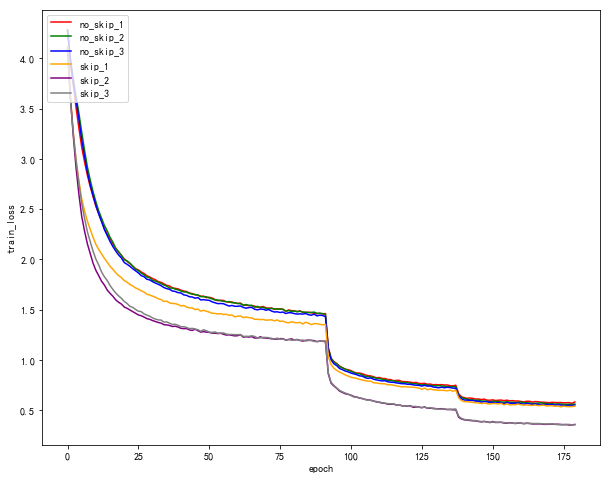

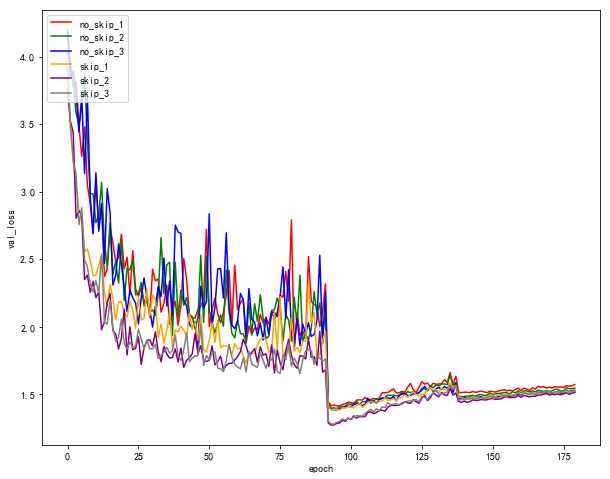

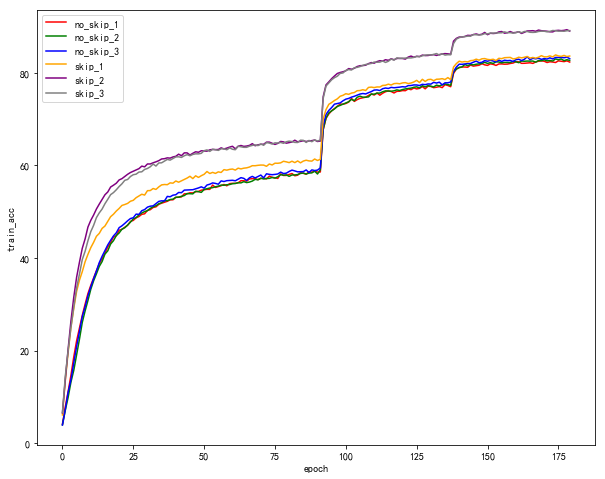

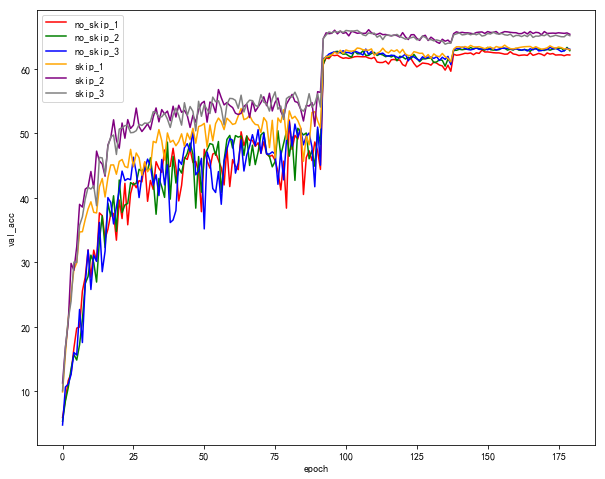

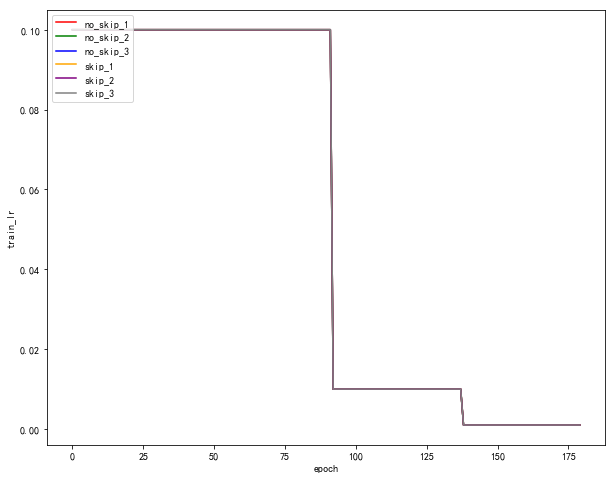

In [6]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

legend_skip = ['no_skip_1', 'no_skip_2', 'no_skip_3', 'skip_1', 'skip_2', 'skip_3']
plt_different_history(history_structure, legend_skip)